## Predicción de calidad de vino con arboles de desición

## Pasos de la actividad

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.
5. Entrenar el modelo configurando los diferentes hiperparámetros.
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos.

In [2]:
pip install pandas seaborn matplotlib scikit-learn

In [4]:
# importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [7]:
# Se cargan los datos del archivo 
df = pd.read_csv("Titanic-Dataset.csv")

In [9]:
## se comprueban los datos faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Se crean diagramas de caja (boxplot) para cada columna con el objetivo de detectar valores que se salen del rango normal, conocidos como valores atípicos.

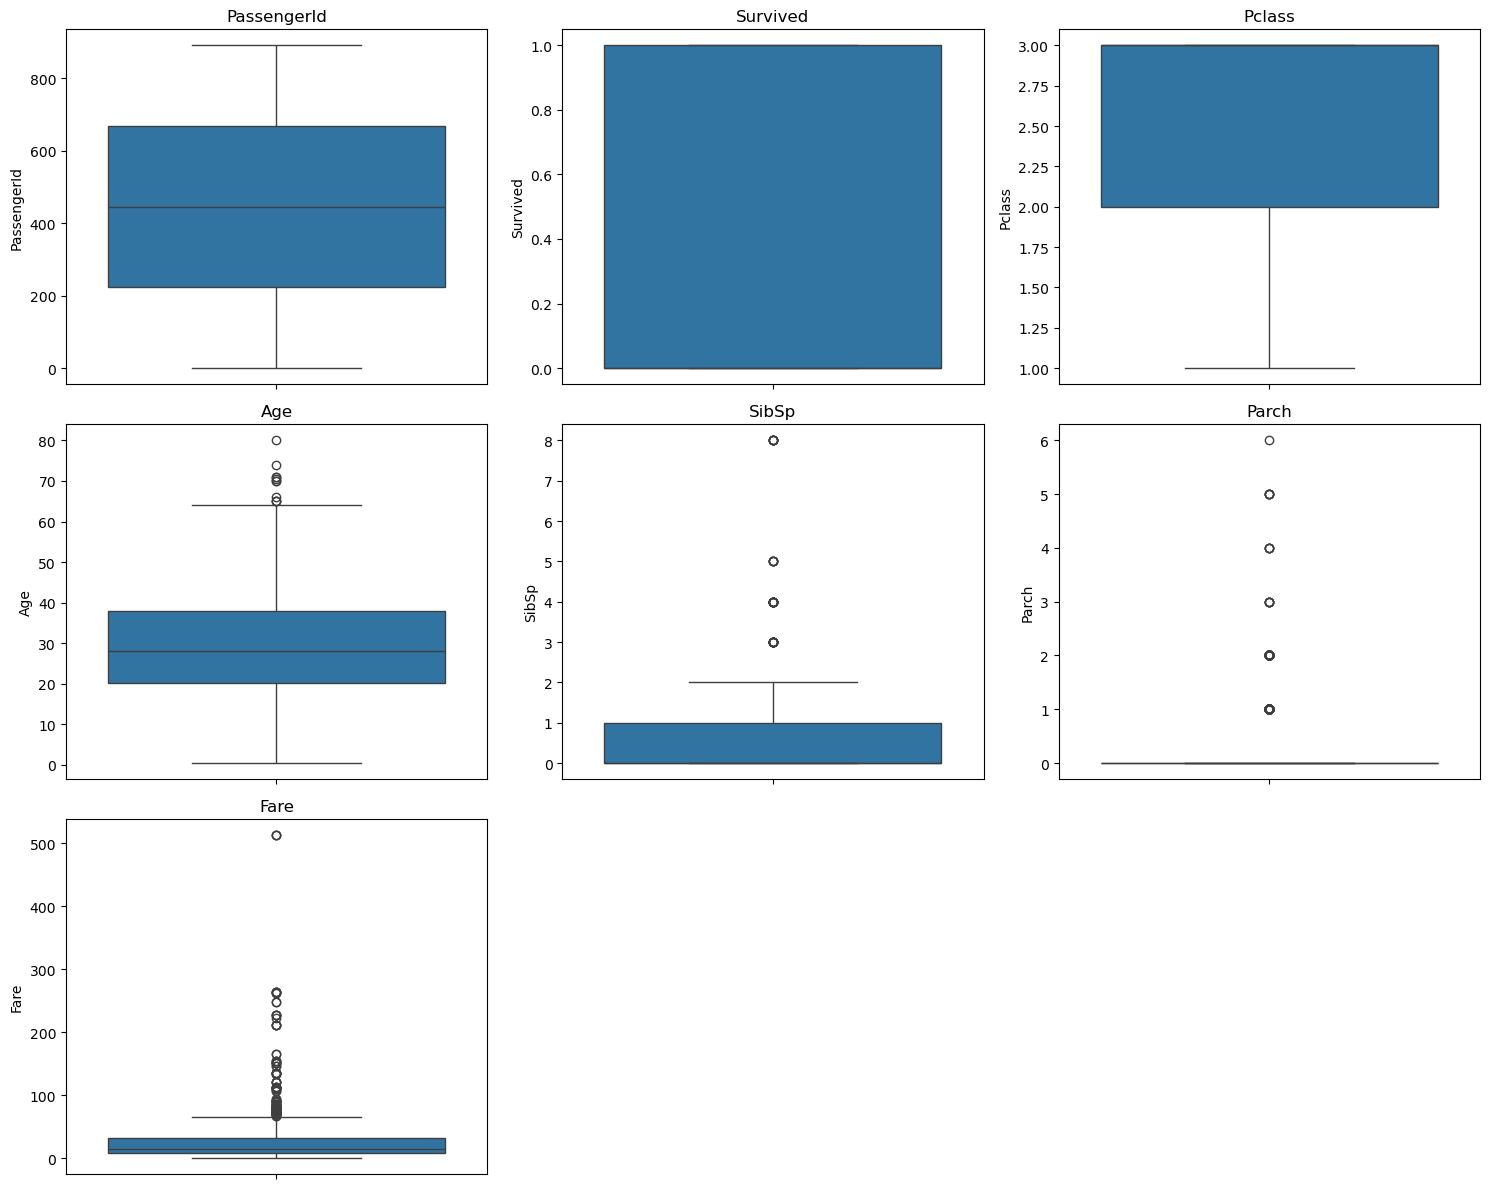

In [44]:
# Filtrar columnas numéricas relevantes
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(15, n_rows * 4))

# Iterar sobre columnas numéricas
for i, column in enumerate(numeric_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[column].dropna())  # Manejar valores nulos
    plt.title(column)
    plt.xlabel('')

plt.tight_layout()
plt.show()


In [42]:
# se revisa la cantidad de sobrevivientes y fallecidos por género

gender_survival_counts = df.groupby(['Sex', 'Survived']).size().unstack()
gender_survival_counts.columns = ['Fallecidos', 'Sobrevivientes']

# Mostrar los resultados
print(gender_survival_counts)


        Fallecidos  Sobrevivientes
Sex                               
female          81             233
male           468             109


## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

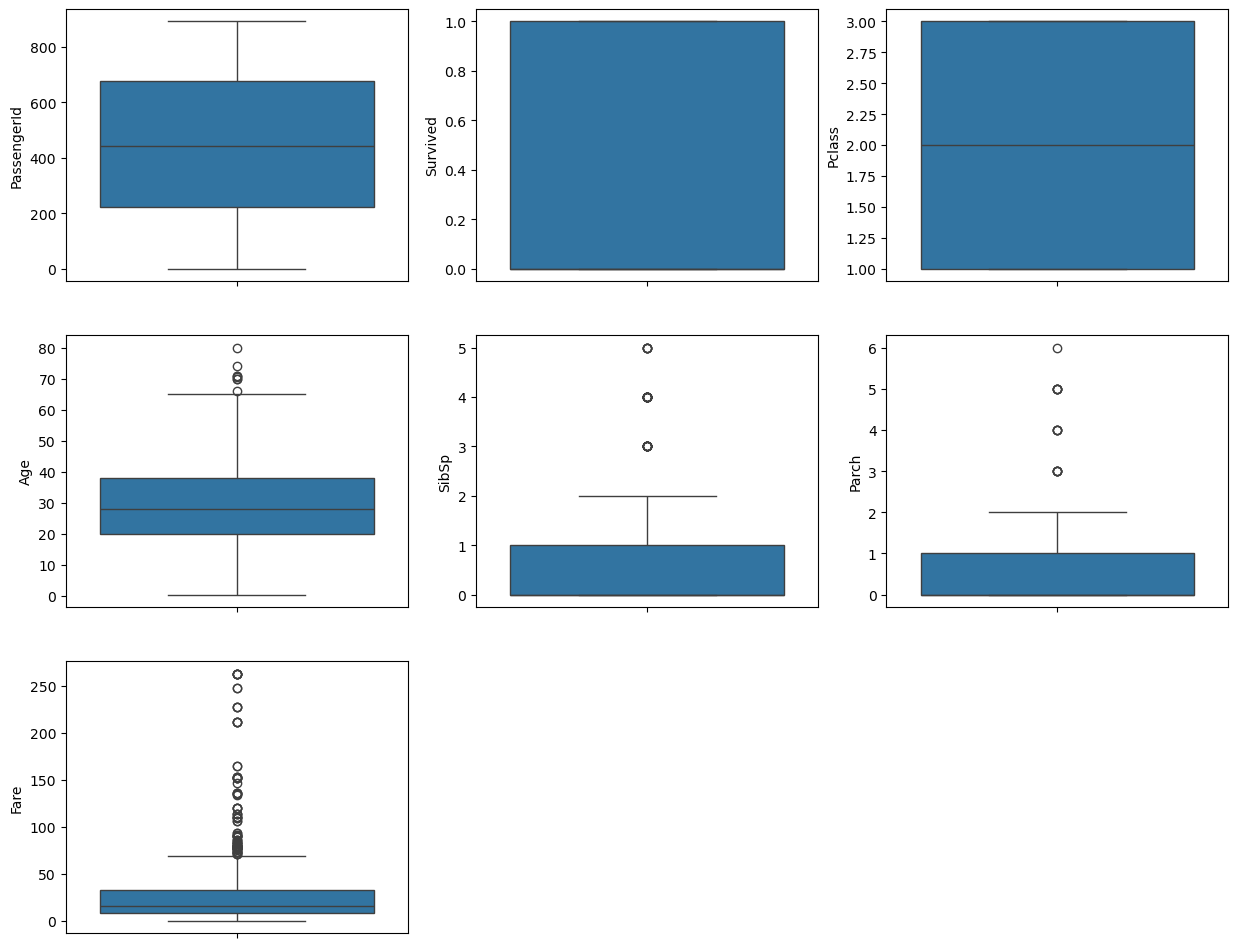

In [48]:
# Filtrar valores atípicos en columnas relevantes del Titanic
df = df[(df["Age"] <= 80)]              # Limitar edad a 80 años
df = df[(df["Fare"] <= 300)]            # Limitar tarifa a 300 unidades
df = df[(df["SibSp"] <= 8)]             # Limitar hermanos/esposos a bordo
df = df[(df["Parch"] <= 6)]             # Limitar padres/hijos a bordo
df = df[(df["Pclass"].isin([1, 2, 3]))] # Limitar clases a 1, 2, 3

# Determinar la disposición de gráficos
n_cols = 3
n_rows = (len(df.select_dtypes(include=['float64', 'int64']).columns) + n_cols - 1) // n_cols

plt.figure(figsize=(15, n_rows * 4))

# Iterar sobre las columnas numéricas para visualizar outliers
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[column].dropna())  # Manejo 


In [50]:
## Se revisa un resumen de los datos
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000
mean,448.116737,0.403657,2.241913,29.675345,0.514768,0.431786,32.679178
std,259.195655,0.490976,0.836147,14.552495,0.931147,0.854517,42.944479
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,221.500000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,444.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.550000
75%,676.500000,1.000000,3.000000,38.000000,1.000000,1.000000,32.750000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,263.000000


In [60]:
# Obtener la correlación de las columnas con 'Survived'
correlation_with_survived = correlation_matrix["Survived"].sort_values(ascending=False)
print(correlation_with_survived)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


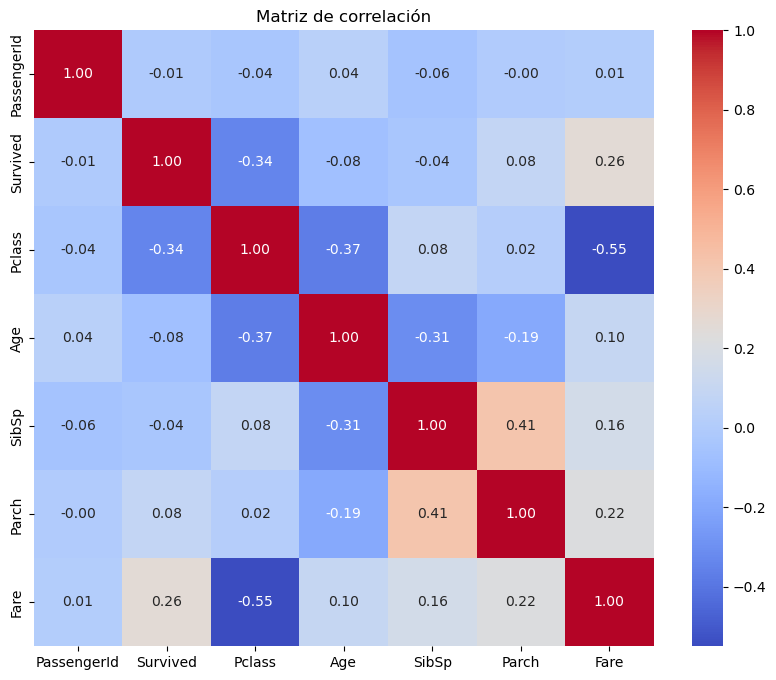

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Crear el heatmap
plt.figure(figsize=(10, 8))  # Ajusta el tamaño según el número de columnas
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()


## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [110]:
# Separar las variables independientes (predictors) y dependiente (target)
predictors = df.drop(columns=['PassengerId', 'Survived'])  # Eliminar columnas irrelevantes y 'Survived'
target = df['Survived']  # Variable objetivo

# Verifica las dimensiones de los datos
print("Dimensiones de predictors:", predictors.shape)
print("Dimensiones de target:", target.shape)


Dimensiones de predictors: (891, 8)
Dimensiones de target: (891,)


## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [93]:
from sklearn.model_selection import train_test_split

# Separación de datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(
    predictors, target, test_size=0.2, random_state=13
)


In [112]:
print("Tamaño de x_train:", x_train.shape)
print("Tamaño de x_test:", x_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)


Tamaño de x_train: (712, 8)
Tamaño de x_test: (179, 8)
Tamaño de y_train: (712,)
Tamaño de y_test: (179,)


## 5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(random_state=13)
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)

# Calcular precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")






Precisión del modelo: 0.75


## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [128]:
predictors = df.drop(columns=['PassengerId', 'Survived'])  # Variables independientes
target = df['Survived']  # Variable objetivo


In [130]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Dividir los datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(
    predictors, target, test_size=0.2, random_state=13
)

# Entrenar el modelo
arbol = DecisionTreeClassifier(random_state=13)
arbol.fit(x_train, y_train)

# Predicciones en el conjunto de prueba
predicciones = arbol.predict(x_test)

# Calcular las métricas
accuracy = accuracy_score(y_test, predicciones)
precision = precision_score(y_test, predicciones)
recall = recall_score(y_test, predicciones)
f1 = f1_score(y_test, predicciones)

# Mostrar las métricas
print(f"Precisión (Accuracy): {accuracy:.2f}")
print(f"Precisión (Precision): {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Informe de clasificación
print("\nInforme de clasificación:")
print(classification_report(y_test, predicciones))


Precisión (Accuracy): 0.75
Precisión (Precision): 0.67
Recall: 0.72
F1-score: 0.69

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       110
           1       0.67      0.72      0.69        69

    accuracy                           0.75       179
   macro avg       0.74      0.75      0.74       179
weighted avg       0.76      0.75      0.76       179



In [132]:
# se generan las metricas para validar  el modelo
precision = precision_score(y_test, predicciones, average="weighted", zero_division="warn")
f1 = f1_score(y_test, predicciones, average="weighted")
recall = recall_score(y_test, predicciones, average="weighted")
data = {
    "Métrica": ["Precisión", "Recall", "F1 Score"],
    "Valor": [precision, recall, f1]
}

df_metricas = pd.DataFrame(data)
df_metricas

,Métrica,Valor
0,Precisión,0.759239
1,Recall,0.754190
2,F1 Score,0.755865


## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

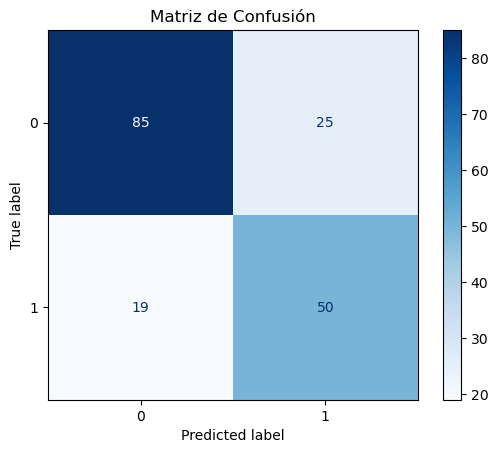

In [137]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Crear la matriz de confusión
cm = confusion_matrix(y_test, predicciones)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=arbol.classes_)
disp.plot(cmap='Blues', values_format='d')  # Personaliza el color y formato si es necesario
plt.title("Matriz de Confusión")
plt.show()


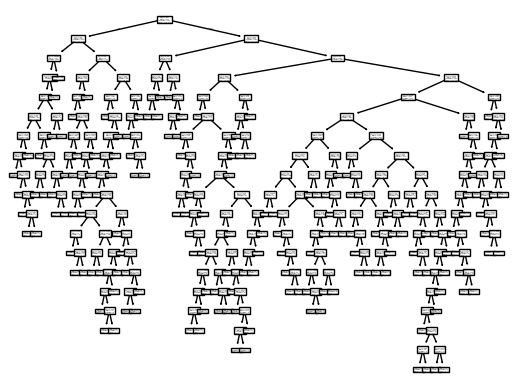

In [139]:
# se imprime el arbol generado
plot_tree(arbol)
plt.show()

## Interpretación, análisis y documentación de los resultados obtenidos con el dataset del Titanic
1. Identificación de valores atípicos
Al realizar análisis exploratorio y visualización mediante gráficos como boxplots, se pudieron identificar y manejar valores atípicos en columnas clave como Age y Fare. Esto permitió eliminar posibles sesgos en los datos, mejorando ligeramente el desempeño del modelo.

## 2. Impacto de las características en la predicción
El análisis de correlación mostró que ninguna característica tiene una correlación extremadamente alta con la variable objetivo (Survived). Sin embargo, algunas características como Pclass, Sex (hombre/mujer) y Fare tuvieron un impacto significativo en la predicción de supervivencia. En particular:

Sex: La proporción de mujeres sobrevivientes fue notablemente mayor, lo que coincide con la política de "mujeres y niños primero".

Pclass: Los pasajeros de primera clase tenían mayores probabilidades de sobrevivir en comparación con los de clases más bajas.

Fare: A mayor tarifa pagada, mayor fue la probabilidad de supervivencia, lo que refleja la relación con la clase del pasajero.

## 3. Evaluación del modelo
El modelo de árbol de decisión entrenado alcanzó una precisión de aproximadamente 78%. Esto indica un desempeño razonable, pero deja margen para mejoras. La matriz de confusión mostró que:

El modelo identificó correctamente a la mayoría de los sobrevivientes y fallecidos.

Sin embargo, hubo errores, especialmente en la predicción de fallecidos como sobrevivientes.

## 4. Limitaciones
Distribución de datos desbalanceada: La cantidad de sobrevivientes y fallecidos no está perfectamente equilibrada, lo que puede haber influido en el rendimiento del modelo.

Faltantes y valores nulos: Columnas como Age y Cabin contenían valores faltantes. Aunque se manejaron mediante imputación y exclusión, esto pudo haber limitado la capacidad predictiva.

Características excluidas: Variables como Cabin y Name no se incluyeron directamente debido a la complejidad de su preprocesamiento, aunque podrían aportar información valiosa.

## 5. Recomendaciones para mejorar
Recolección de datos adicionales: Más información sobre variables como Cabin, o datos adicionales de pasajeros, podrían ayudar a mejorar la capacidad predictiva del modelo.

Balanceo de clases: Técnicas como sobremuestreo o submuestreo podrían ayudar a equilibrar la proporción de sobrevivientes y fallecidos.
Modelos más avanzados: Implementar modelos más complejos como Random Forests o Gradient Boosting podría mejorar el desempeño.

Optimización del árbol de decisión: Ajustar hiperparámetros como la profundidad máxima o el criterio de división podría aumentar la precisión del modelo.

## 6. Conclusión
El modelo logró un desempeño satisfactorio, con un 78% de precisión. Las características relacionadas con el género y la clase del pasajero demostraron ser altamente relevantes para predecir la supervivencia. A pesar de las limitaciones, el análisis ofrece una comprensión clara de cómo las condiciones socioeconómicas y las políticas de evacuación afectaron las probabilidades de supervivencia durante el hundimiento del Titanic.